#  **Flipkart Customer Satisfaction Analysis Using Python**



# ***Let's Begin !***

## ***1. Know the Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Dataset Loading

In [2]:
# Load Dataset
df=pd.read_csv("Customer_support_data.csv")


### Dataset First View

In [3]:
# Dataset First Look
df.head()

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
rows,columns=df.shape
print(f"No. of Rows: {rows}")
print(f"No. of Columns:{columns}")

No. of Rows: 85907
No. of Columns:20


### Dataset Information

In [5]:
# Dataset Info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
duplicated_count=df.duplicated().sum()    # No. of duplicate rows
print(f"No. of duplicate rows: {duplicated_count}")

No. of duplicate rows: 0


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
missing_values=df.isna().sum()
print(missing_values)




Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64


In [8]:
# Percentage of Missing Values
missing_values_percentage=df.isna().mean()*100
print(missing_values_percentage)

Unique id                   0.000000
channel_name                0.000000
category                    0.000000
Sub-category                0.000000
Customer Remarks           66.542889
Order_id                   21.222950
order_date_time            79.962052
Issue_reported at           0.000000
issue_responded             0.000000
Survey_response_Date        0.000000
Customer_City              80.119199
Product_category           79.983005
Item_price                 79.971364
connected_handling_time    99.718300
Agent_name                  0.000000
Supervisor                  0.000000
Manager                     0.000000
Tenure Bucket               0.000000
Agent Shift                 0.000000
CSAT Score                  0.000000
dtype: float64


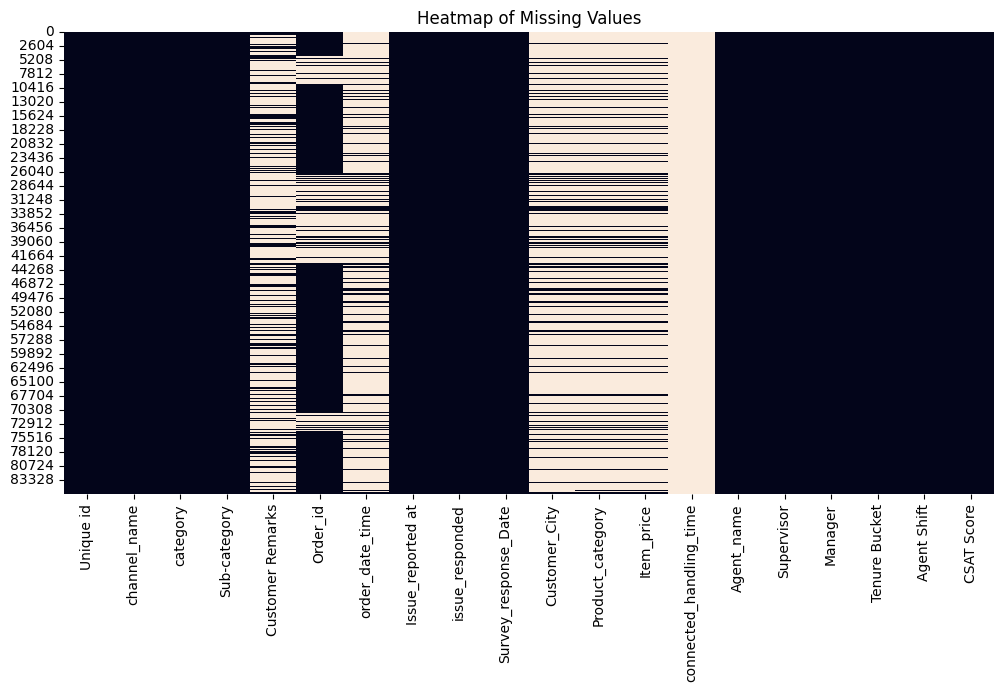

In [9]:
# Visualizing the missing values
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(),cbar=False)
plt.title("Heatmap of Missing Values")
plt.show()

## ***2. Understanding the Variables***

In [10]:
# Dataset Columns
df.columns


Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')

In [11]:
# Dataset Describe
## Statistical Summary of Numerical Columns
print("\n Statititical Summary of Numerical Columns: \n",df.describe())

## Statistical Summary of Categorical Columns
print("\n Statititical Summary of Categorical Columns: \n",df.describe(include="object"))


 Statititical Summary of Numerical Columns: 
           Item_price  connected_handling_time    CSAT Score
count   17206.000000               242.000000  85907.000000
mean     5660.774846               462.400826      4.242157
std     12825.728411               246.295037      1.378903
min         0.000000                 0.000000      1.000000
25%       392.000000               293.000000      4.000000
50%       979.000000               427.000000      5.000000
75%      2699.750000               592.250000      5.000000
max    164999.000000              1986.000000      5.000000

 Statititical Summary of Categorical Columns: 
                                    Unique id channel_name category  \
count                                  85907        85907    85907   
unique                                 85907            3       12   
top     07c7a878-0d5a-42e0-97ef-de59abec0238      Inbound  Returns   
freq                                       1        68142    44097   

             

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

### Variables Description

1.  Unique id: Unique identifier for each entry or record in the dataset.
2.  channel_name: Name of the channel where the issue or feedback was reported.
3.  category: Category of the issue or feedback.
4.  Sub-category: Specific sub-category under the main category.
5.  Customer Remarks: Comments or remarks provided by the customer.
6.  Order_id: Unique identifier for each order.
7.  order_date_time: Date and time when the order was placed.
8.  Issue_reported at: Timestamp indicating when the issue was reported.

9.  issue_responded: Timestamp indicating when the issue was responded to.

10. Survey_response_Date: Date when the customer survey response was recorded.

11. Customer_City: City of the customer.

12. Product_category: Category of the product related to the issue or feedback.

13. Item_price: Price of the item associated with the order.

14. connected_handling_time: Time taken to handle the connection or issue.

15. Agent_name: Name of the agent who handled the issue or feedback.

16. Supervisor: Name of the supervisor overseeing the issue or feedback.

17. Manager: Name of the manager overseeing the process.

18. Tenure Bucket: Bucket representing the tenure or duration related to the agent or issue.

19. Agent Shift: Agent shift indicates the shift type based on (Morning,Evening, Afternoon, Night, Split)

20. Csat score: Csat score describes the satisfaction score for each order_id




### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
for col in df.columns:
  unique_values=df[col].nunique()
  print(f"No. of Unique values in {col}: {unique_values}")

No. of Unique values in Unique id: 85907
No. of Unique values in channel_name: 3
No. of Unique values in category: 12
No. of Unique values in Sub-category: 57
No. of Unique values in Customer Remarks: 18231
No. of Unique values in Order_id: 67675
No. of Unique values in order_date_time: 13766
No. of Unique values in Issue_reported at: 30923
No. of Unique values in issue_responded: 30262
No. of Unique values in Survey_response_Date: 31
No. of Unique values in Customer_City: 1782
No. of Unique values in Product_category: 9
No. of Unique values in Item_price: 2789
No. of Unique values in connected_handling_time: 211
No. of Unique values in Agent_name: 1371
No. of Unique values in Supervisor: 40
No. of Unique values in Manager: 6
No. of Unique values in Tenure Bucket: 5
No. of Unique values in Agent Shift: 5
No. of Unique values in CSAT Score: 5


## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
df.isnull().sum()

,0
Unique id,0
channel_name,0
category,0
Sub-category,0
Customer Remarks,57165
Order_id,18232
order_date_time,68693
Issue_reported at,0
issue_responded,0
Survey_response_Date,0


In [15]:
# Since the 'connected_handling_time' column has 100% null values, we will drop the column
df=df.drop('connected_handling_time',axis=1)

In [16]:
# Remove the null values from Order_id column
df=df.dropna(subset=['Order_id'])

In [17]:
# Converting Order_date_time Columnn from object to datetime format.
df['order_date_time']=pd.to_datetime(df['order_date_time'],format='%d/%m/%Y %H:%M',errors='coerce')

/tmp/ipython-input-17-2215958489.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['order_date_time']=pd.to_datetime(df['order_date_time'],format='%d/%m/%Y %H:%M',errors='coerce')


In [18]:
# Converting issue_reported_at Columnn from object to datetime format.
df['Issue_reported at']=pd.to_datetime(df['Issue_reported at'],format='%d/%m/%Y %H:%M',errors='coerce')

In [19]:
# Converting issue_responded Columnn from object to datetime format.
df['issue_responded']=pd.to_datetime(df['issue_responded'],format='%d/%m/%Y %H:%M',errors='coerce')

In [20]:
# Converting Survey_response_Date Columnn from object to datetime format.
df['Survey_response_Date']=pd.to_datetime(df['Survey_response_Date'],errors='coerce',dayfirst=True)

/tmp/ipython-input-20-795701340.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Survey_response_Date']=pd.to_datetime(df['Survey_response_Date'],errors='coerce',dayfirst=True)


In [21]:
# No. of Null Values in Customer Remarks Column
print(f"No. of Null Values in Customer Remarks Column is: {df['Customer Remarks'].isnull().sum()}")

No. of Null Values in Customer Remarks Column is: 45036


In [22]:
# Since Customer Remarks has 45036 null values and it is crucial in terms of building a customer satisfication model.
# Hence instead of dropping null rows we will fill the null values with 'NA' as remarks.
df['Customer Remarks']=df['Customer Remarks'].fillna('NA')


In [23]:
df['Customer Remarks'].unique()

array(['NA', 'Very good',
       "Shopzilla app and it's all coustomer care services is very good service provided all time",
       ...,
       "Trough the Shopzilla App Refunding Policy should be easier and stepwise successful so that a customer need not communicate with the customer care; 'Return and Refund' must be 100% feasible through the App.",
       'Supported team customer executive   good',
       'need to improve with proper details.'], dtype=object)

In [24]:
# Convert Customer Remarks to lowercase and remove leading/trailing spaces to reduce duplicates
df['Customer Remarks'] = df['Customer Remarks'].str.lower().str.strip()
df['Customer Remarks'].unique()

array(['na', 'very good',
       "shopzilla app and it's all coustomer care services is very good service provided all time",
       ...,
       "trough the shopzilla app refunding policy should be easier and stepwise successful so that a customer need not communicate with the customer care; 'return and refund' must be 100% feasible through the app.",
       'supported team customer executive   good',
       'need to improve with proper details.'], dtype=object)

In [25]:
# Replace occurrences of 'good??' with 'good'
df['Customer Remarks'] =df['Customer Remarks'].replace('good??', 'good')

In [26]:
df.columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'Agent_name', 'Supervisor', 'Manager',
       'Tenure Bucket', 'Agent Shift', 'CSAT Score'],
      dtype='object')

In [27]:
# Total Null Values in order_date_time
print(f"Total Null Values in order_date_time: {df['order_date_time'].isnull().sum()}")

Total Null Values in order_date_time: 50461


In [28]:
# Filling Null values in order_date_time
df['order_date_time']=df['order_date_time'].fillna(df['Issue_reported at'])

In [29]:
# Extracting various date and time components from the 'order_date_time' column
df['day'] = df['order_date_time'].dt.day_name()
df['year'] = df['order_date_time'].apply(lambda x: x.year)
df['month_num'] = df['order_date_time'].apply(lambda x: x.month)
df['day_num'] = df['order_date_time'].apply(lambda x: x.day)
df['hour'] = df['order_date_time'].apply(lambda x: x.hour)
df['minute'] = df['order_date_time'].apply(lambda x: x.minute)
df['month'] = df['order_date_time'].dt.month_name()

In [30]:
# Total Null Values in Customer_City
print(f"Total Null Values in Customer_City: {df['Customer_City'].isnull().sum()}")

Total Null Values in Customer_City: 50596


In [31]:
# Filling Null values of Customer_City Column.
df['Customer_City']=df['Customer_City'].fillna('Not Given')

In [32]:
# Total Null Values in Product_category
print(f"Total Null Values in Product_category: {df['Product_category'].isnull().sum()}")

Total Null Values in Product_category: 50479


In [33]:
# Filling Null values of Product_category Column
df['Product_category']=df['Product_category'].fillna('Not Available')

In [34]:
# Total Null values in Item_price
print(f"Total Null Values in Item_price: {df['Item_price'].isnull().sum()}")

Total Null Values in Item_price: 50469


In [35]:
# Filling Null values of Item_price column
df['Item_price']=df['Item_price'].fillna(0)

In [36]:
# checkin(g null Values after filling all
df.isnull().sum()

,0
Unique id,0
channel_name,0
category,0
Sub-category,0
Customer Remarks,0
Order_id,0
order_date_time,0
Issue_reported at,0
issue_responded,0
Survey_response_Date,0


## ***4. Data Visualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [37]:
df['category'].value_counts()

,count
category,
Returns,34501
Order Related,18751
Refund Related,3690
Product Queries,2640
Shopzilla Related,2078
Feedback,1856
Cancellation,1833
Payments related,1781
Offers & Cashback,354


#### Chart-1

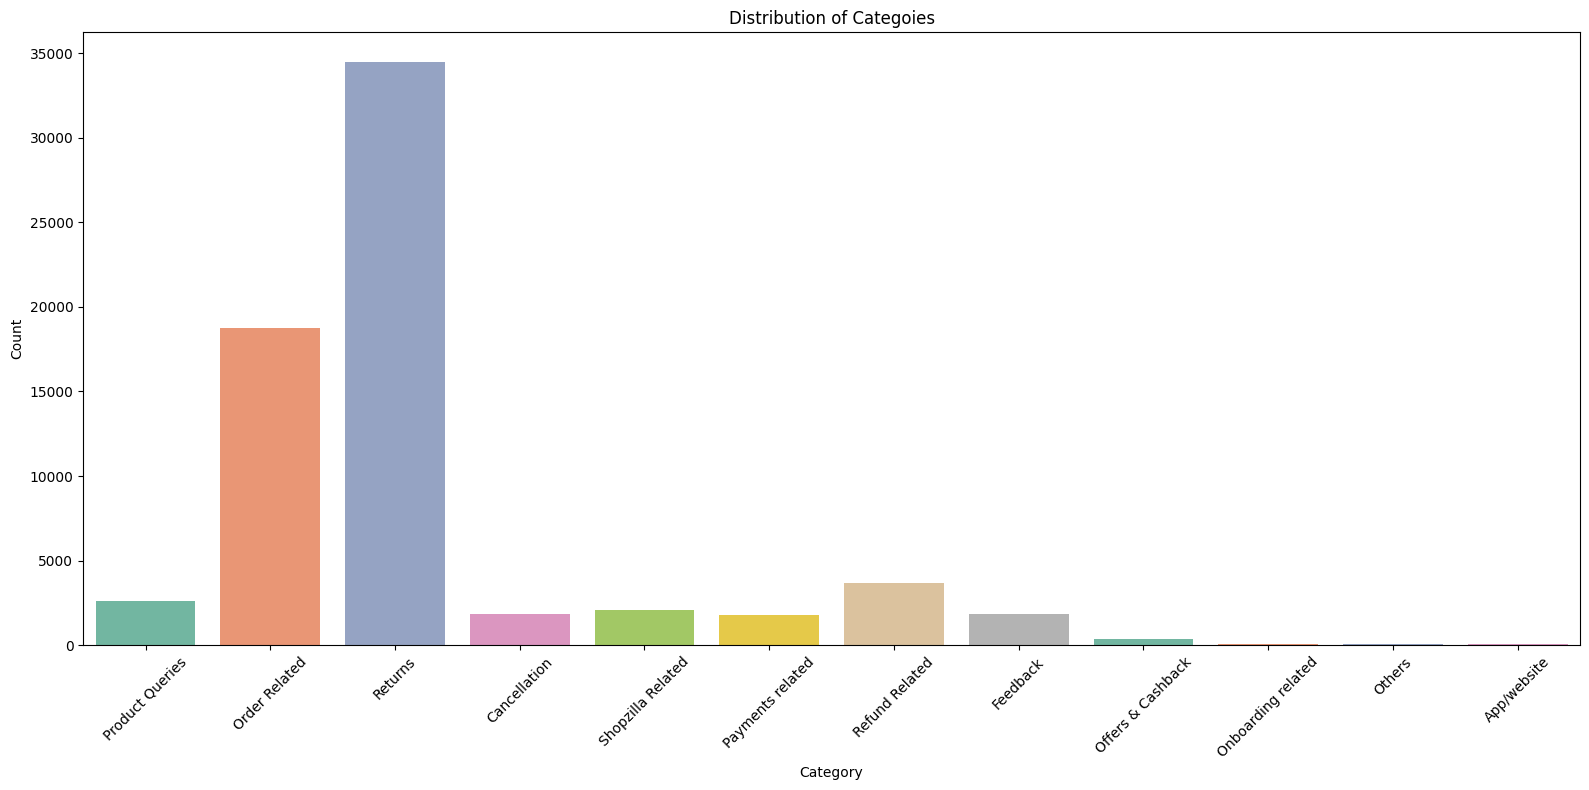

In [38]:
# Chart - 1 visualization code
plt.figure(figsize=(16,8))
sns.countplot(data=df,x='category',palette='Set2',hue='category',legend=False)
plt.title("Distribution of Categoies")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### 1. What is/are the insight(s) found from the chart?

The bar chart indicates that the "Return" category has the highest count, with more than 30,000 occurrences. The "Order-related" category follows with over 15,000, while the "Refund-related" category has around 5,000.

##### 2. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights can drive positive business impact by highlighting areas for improvement, like addressing high return rates to boost customer satisfaction. However, the high number of returns and order-related issues could indicate problems with product quality or fulfillment processes, potentially leading to customer dissatisfaction and revenue loss if not resolved.

#### Chart - 2

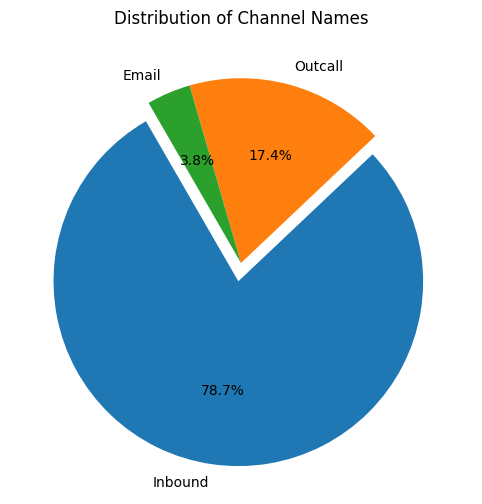

In [39]:
# Chart-2 visualization code
# Calculate value counts and the most frequent channel
channel_counts = df['channel_name'].value_counts()
most_frequent_channel = df['channel_name'].mode()[0]

explode = [0.1 if label == most_frequent_channel else 0 for label in channel_counts.index]

plt.figure(figsize=(10, 6))
plt.pie(channel_counts, labels=channel_counts.index, autopct='%1.1f%%', explode=explode, startangle=120)
plt.title('Distribution of Channel Names')
plt.show()

1. Why did I pick the specific chart?

 I selected the pie chart to illustrate the distribution of various communication channels.

2. What is/are the insight(s) found from the chart?

Here By plotting the pie chart, I discovered that Inbound accounts for approximately 78.7% of the distribution, followed by Outcall at 17.4%, while Email has the smallest share at 3.8%.

3.  Will the gained insights help creating a positive business impact?
    
    Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained can significantly benefit the business by identifying the primary channels where most customer interactions take place, such as Inbound and Outcall. This allows the company to allocate resources more effectively to these high-traffic channels, enhancing operational efficiency and customer experience. Conversely, the lower preference for the email channel indicates a potential area of concern, as it may negatively impact the business by not meeting customer expectations in this medium.

#### Chart-3

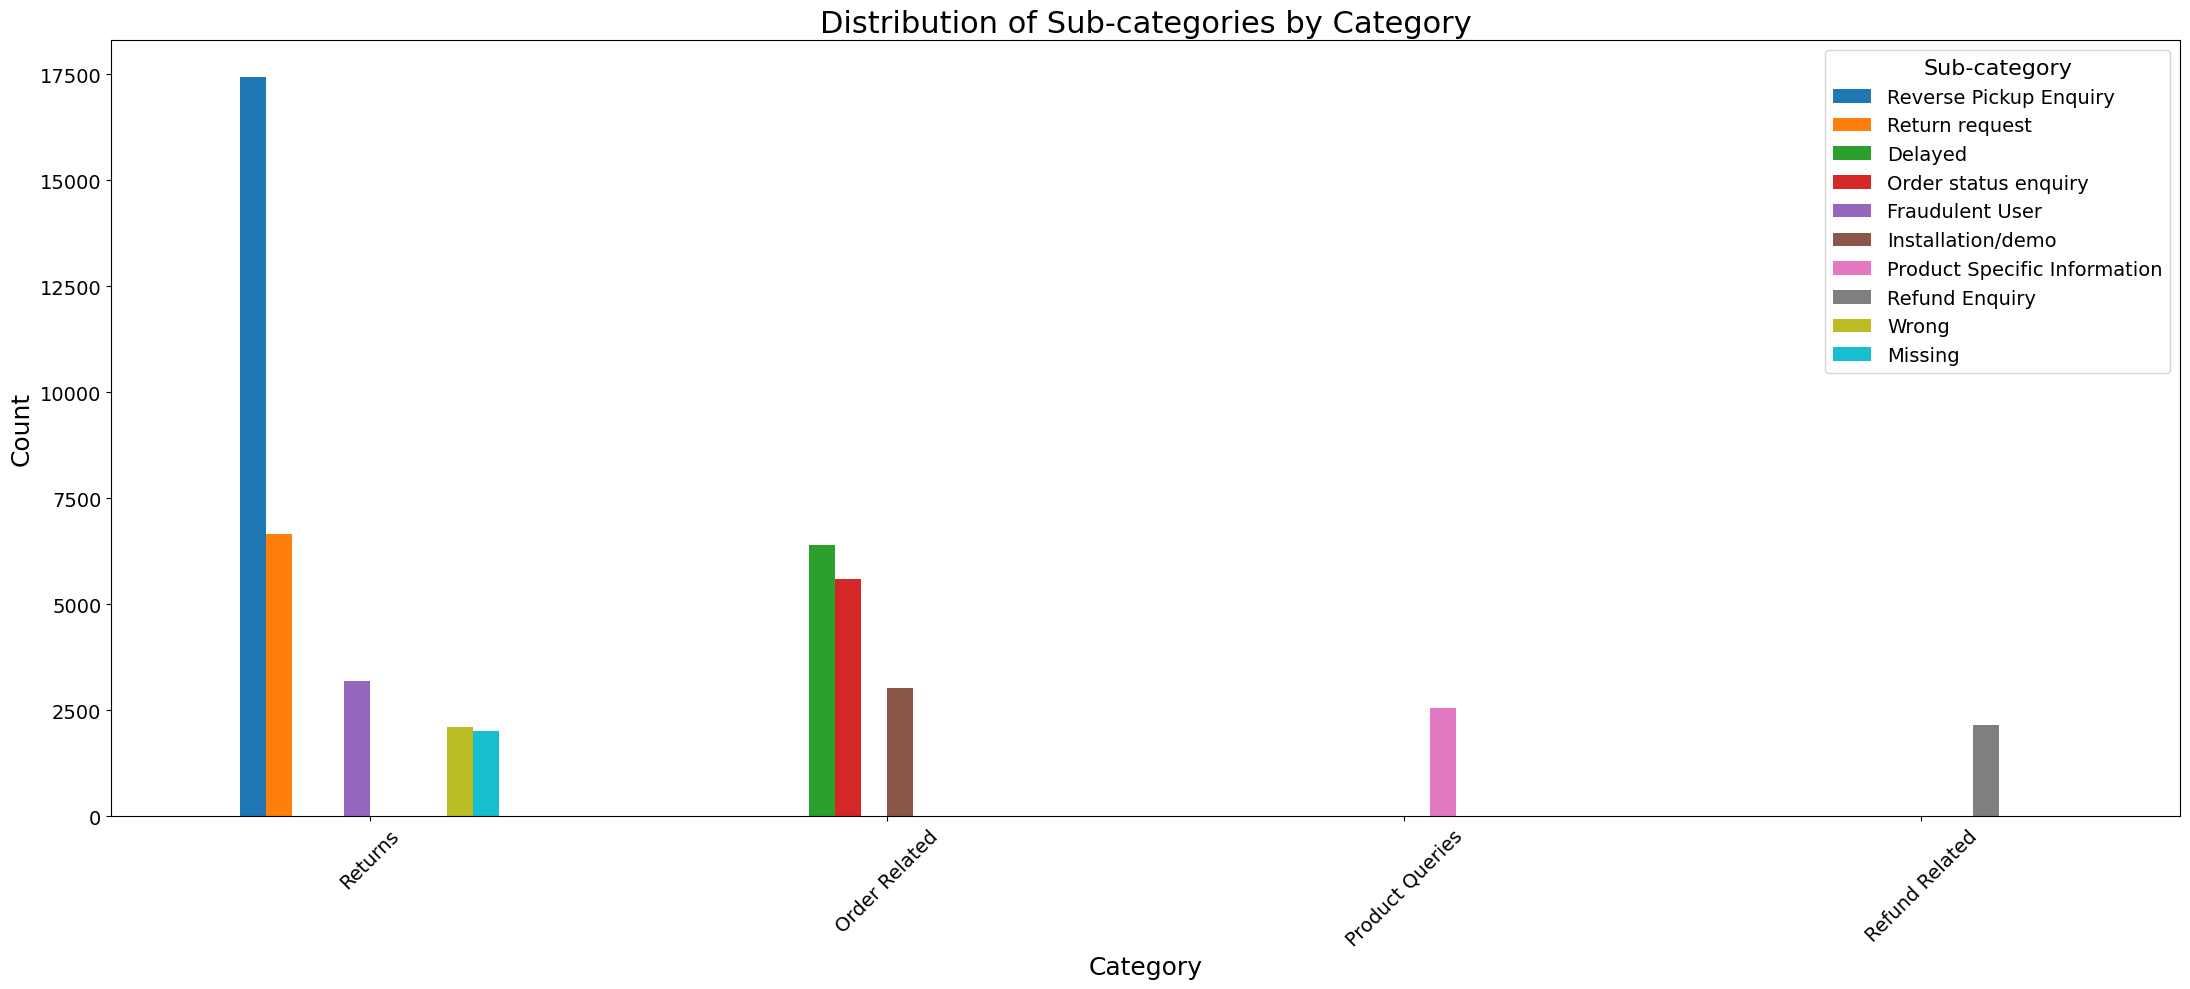

In [40]:
# Chart-3 visualization code
category_sub_category_distribution = df.groupby('category')['Sub-category'].value_counts().nlargest(10)

category_sub_category_distribution.unstack().plot(kind='bar', stacked=False, figsize=(22, 10))

plt.xlabel('Category', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('Distribution of Sub-categories by Category', fontsize=22)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Sub-category', fontsize=14, title_fontsize=16)
plt.tight_layout()
plt.show()

##### 1. Why did I pick the specific chart?

I chose a bar chart to display the counts of the top 10 sub-categories, grouped by their respective categories. This visualization effectively highlights the frequency of each sub-category within its category, providing a clearer view of their distribution across different categories.

##### 2. What is/are the insight(s) found from the chart?

The bar chart illustrates the distribution of sub-categories within each main category, highlighting that "Returns" has the highest frequency, indicating a major area of concern. This is followed by "Reverse Pickup Enquiry" and "Return Request," suggesting significant customer interaction in these areas as well. Understanding these patterns can help the business prioritize resources and develop targeted strategies to address common issues, ultimately improving customer satisfaction and operational efficiency.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, focusing on the "Returns" category and high counts for "Reverse Pickup Enquiry" and "Return Request" allows the business to address key areas, improve customer satisfaction, and reduce operational costs.

High return volumes could indicate issues with product quality or customer dissatisfaction, potentially increasing costs and straining resources. Addressing these problems is crucial to avoid negative growth.

#### Chart - 4

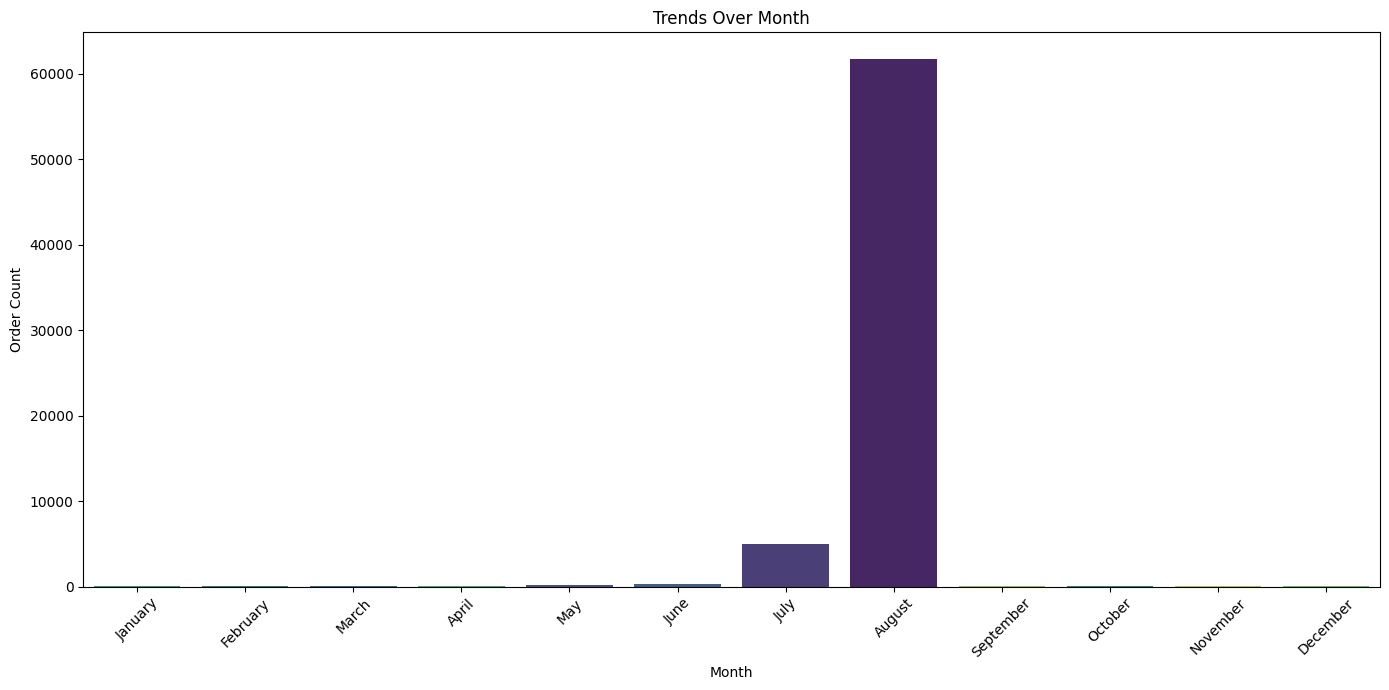

In [41]:
# chart-4 visualization code
plt.figure(figsize=(14,7))
ordered_months=['January','February','March','April','May','June','July','August','September','October','November','December']
sns.countplot(data=df,x=df['month'],order=ordered_months,palette='viridis',hue=df['month'],legend=False)
plt.xlabel('Month')
plt.ylabel('Order Count')
plt.title('Trends Over Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did I pick the specific chart?

I had picked bar chart to show the trends of order counts over months.

##### 2. What is/are the insight(s) found from the chart?

The bar chart illustrates a noticeable surge in order bookings between June and August, with a particularly large increase leading into August. During this period, August stands out as the peak month with the highest volume of order bookings, indicating a strong seasonal trend or promotional influence.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights will certainly help in creating a positive business impact. The observed peak in order bookings from June to August highlights a key period of increased demand. By leveraging this information, businesses can focus their marketing efforts, promotional campaigns, and resource allocation during these months to maximize sales.

However, the insight that order bookings are only decent during the rest of the year, and do not match the high volumes seen between June and August, could be a concern for maintaining consistent growth. The relatively lower order bookings outside of this peak season may indicate periods of stagnation or slower business activity. If not addressed, these quieter periods could hinder overall annual growth.

#### Chart - 5

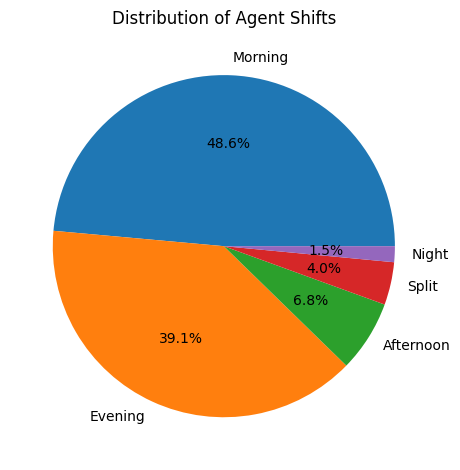

In [42]:
# Chart - 5 visualization code
# Get the distribution of Agent Shift
plt.pie(df['Agent Shift'].value_counts(),labels=df['Agent Shift'].value_counts().index,autopct='%1.1f%%')
plt.title('Distribution of Agent Shifts')
plt.tight_layout()
plt.show()

##### 1. Why did I pick the specific chart?

I have picked pie chart to show the distribution of Agent Shift.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that the morning shift comprises 48.6% of the total, while the evening shift represents 39.1%. The afternoon shift makes up a smaller portion, accounting for just 6.8%.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights show that the morning shift (48.6%) and evening shift (39.1%) are well-utilized, which can enhance operational efficiency and customer satisfaction. However, the afternoon shift (6.8%) is underutilized, potentially leading to gaps in coverage or productivity. Addressing this imbalance is crucial to avoid negative impacts and ensure comprehensive service.

#### Chart - 6

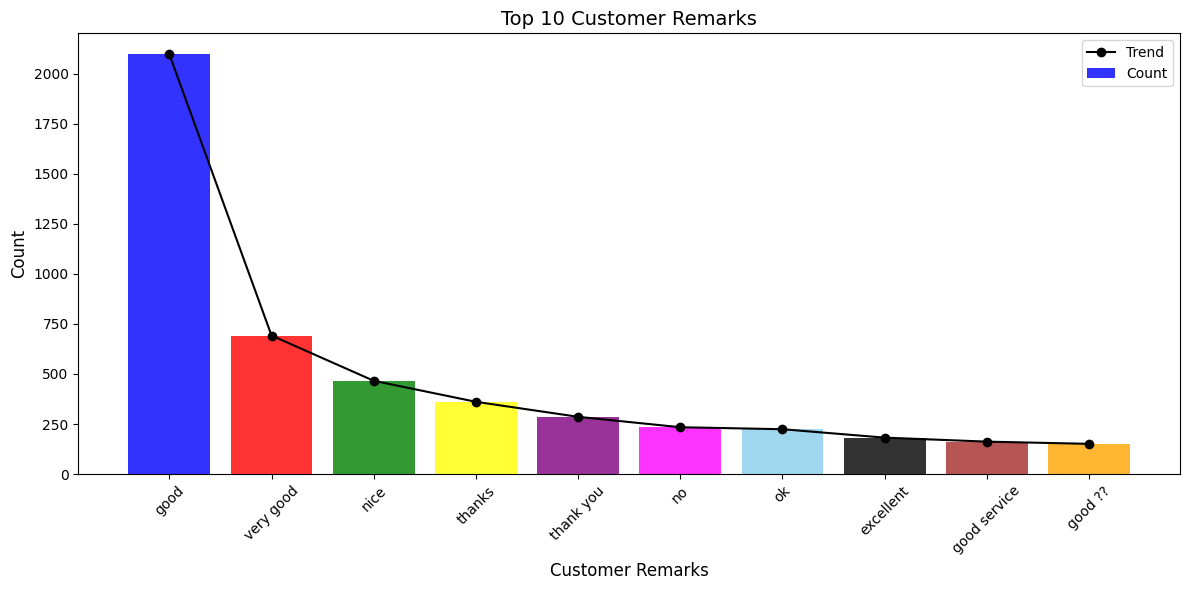

In [43]:
# Chart-6 visualization Code
# Get top 10 non-'na' customer remarks
top_remarks = df['Customer Remarks'].value_counts().drop('na').head(10)

# Plot
plt.figure(figsize=(12, 6))
colors =['blue','red','green','yellow','purple','magenta','skyblue','black','brown','orange']
plt.bar(top_remarks.index, top_remarks.values, color=colors, alpha=0.8, label='Count')
plt.plot(top_remarks.index, top_remarks.values, color='black', marker='o', label='Trend')

# Customize chart
plt.xlabel('Customer Remarks', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Top 10 Customer Remarks', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


##### 1. Why did I pick the specific chart?

I have picked vertical bar chart to identify the count of customer remarks.

##### 2. What is/are the insight(s) found from the chart?

The chart indicates that "good" is the most common remark, with 2000 occurrences, while "very good" has over 500 instances. This suggests an opportunity to enhance the feedback process, potentially encouraging more customers to share their experiences.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

The chart indicates that a large portion of customer feedback is positive, which can be used to showcase strengths and enhance customer satisfaction.

Potential for Negative Growth:

The less frequent remarks, such as "good service" and "excellent," suggest that many customers may not be fully satisfied, potentially indicating a lack of engagement or interest. This could reflect limited customer interaction or follow-up, which may negatively affect overall business performance and the quality of customer insights. Addressing this issue is crucial for improving feedback rates and gaining a clearer understanding of customer experiences.

#### Chart - 7

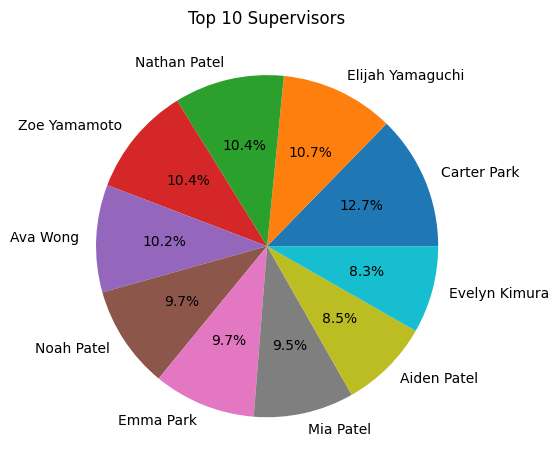

In [44]:
# Chart - 7 visualization code
plt.pie(df['Supervisor'].value_counts().nlargest(10),labels=df['Supervisor'].value_counts().nlargest(10).index,autopct='%1.1f%%')
plt.title('Top 10 Supervisors')
plt.tight_layout()
plt.show()

##### 1. Why did I pick the specific chart?

I had picked Pie-chart to identify the distribution of shifts by the top 10 Supervisor.



##### 2. What is/are the insight(s) found from the chart?

The chart indicates that Supervisor "Carter Park" has the highest occurrence time, accounting for 12.7%. This is followed by "Elijah Yamaguchi" at 10.7%, and both "Nathan Patel" and "Zoe Yamamoto" each at 10.4%.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights indicate that understanding supervisor time allocations can enhance operational efficiency and customer satisfaction. For example, leveraging "Carter Park's" high occurrence time can optimize task management and resource allocation.

#### Chart - 8

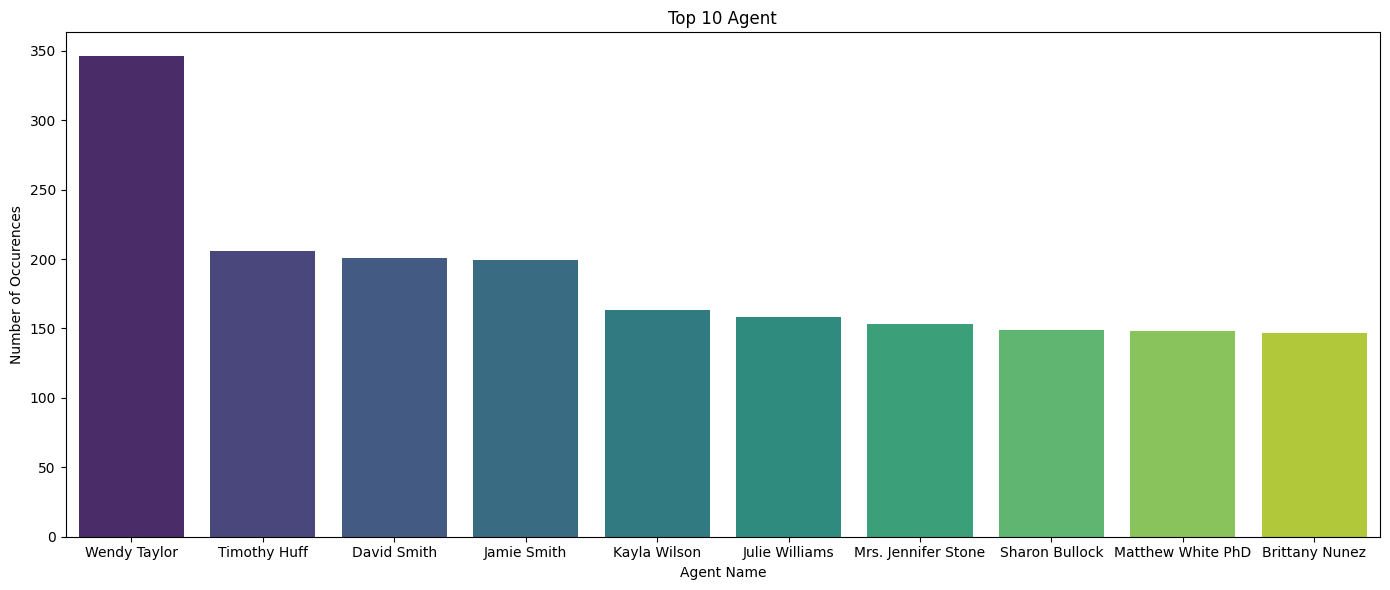

In [45]:
# Chart - 8 visualization code
plt.figure(figsize=(14,6))
top_agent=df['Agent_name'].value_counts().nlargest(10)
sns.barplot(x=top_agent.index,y=top_agent.values,palette='viridis',hue=top_agent.index)
plt.xlabel('Agent Name')
plt.ylabel('Number of Occurences')
plt.title('Top 10 Agent')
plt.tight_layout()
plt.show()

##### 1. Why did I pick the specific chart?

I had picked bar-chart to identify the top Agents.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that Agent Wendy Taylor is the most occured Agent where as the Agent Timothy Huff is the second largest time occured Agent name.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The chart shows Agent Wendy Taylor as the most frequently occurring agent, with Agent Timothy Huff in second place. These insights suggest leveraging Wendy’s expertise could enhance team performance and client satisfaction. However, heavy reliance on Wendy might lead to burnout, and Timothy’s lower ranking could indicate performance issues. Addressing these concerns with balanced workloads and targeted training can prevent negative impacts and foster positive growth.

#### Chart - 9

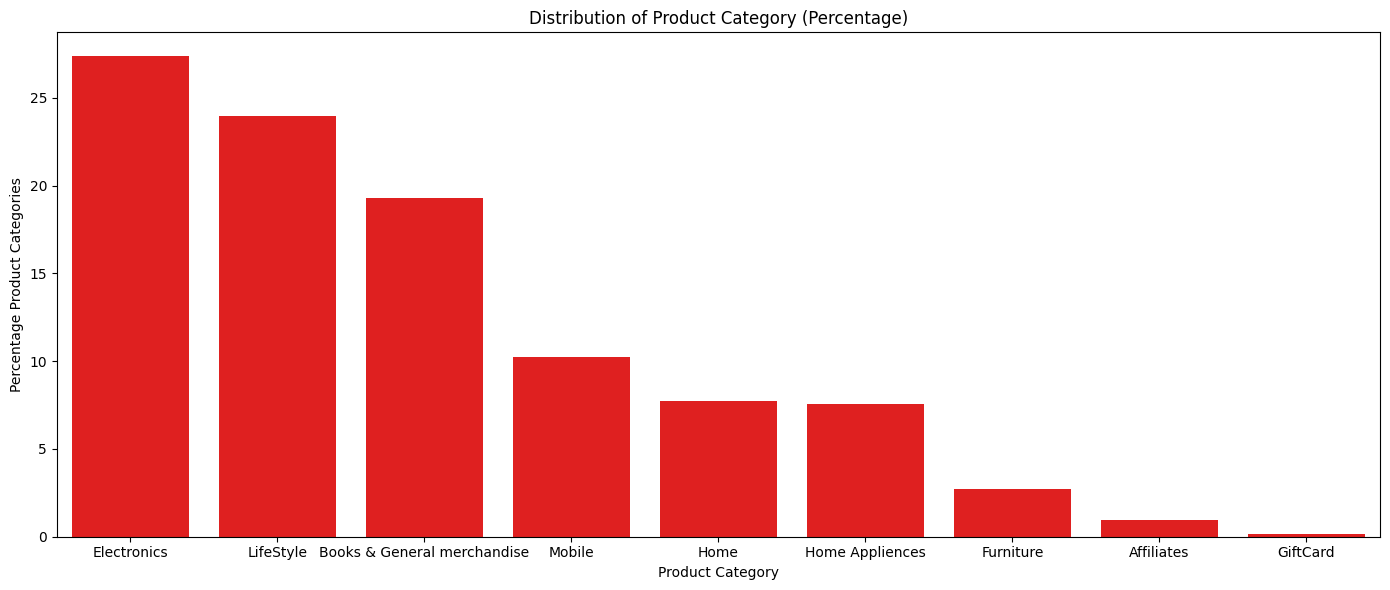

In [46]:
# Chart - 9 visualization code
# Calculating the distribution of product categories
product_category_dist = df['Product_category'].value_counts()
# Filtering out 'Not Available'
product_category_dist = product_category_dist[product_category_dist.index != 'Not Available']
# Calculating the percentage distribution
percentage_distribution = (product_category_dist / product_category_dist.sum()) * 100
plt.figure(figsize=(14,6))

sns.barplot(x=percentage_distribution.index,y=percentage_distribution.values,color='red')
plt.xlabel('Product Category')
plt.ylabel('Percentage Product Categories')
plt.title('Distribution of Product Category (Percentage)')
plt.tight_layout()
plt.show()

##### 1. Why did I pick the specific chart?

I have chosen bar chart to illustrate the percentage distribution of each product category.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that Electronics accounts for more than 25% of the total, while Lifestyle makes up 24%. In contrast, Furniture, Affiliates, and Gift Cards have the lowest percentage shares.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights reveal that Electronics and Lifestyle categories perform well, guiding marketing and inventory strategies. However, the low percentages for Furniture, Affiliates, and Gift Cards indicate underperformance, which may require increased marketing or adjustments to improve growth and customer interest.

#### Chart - 10

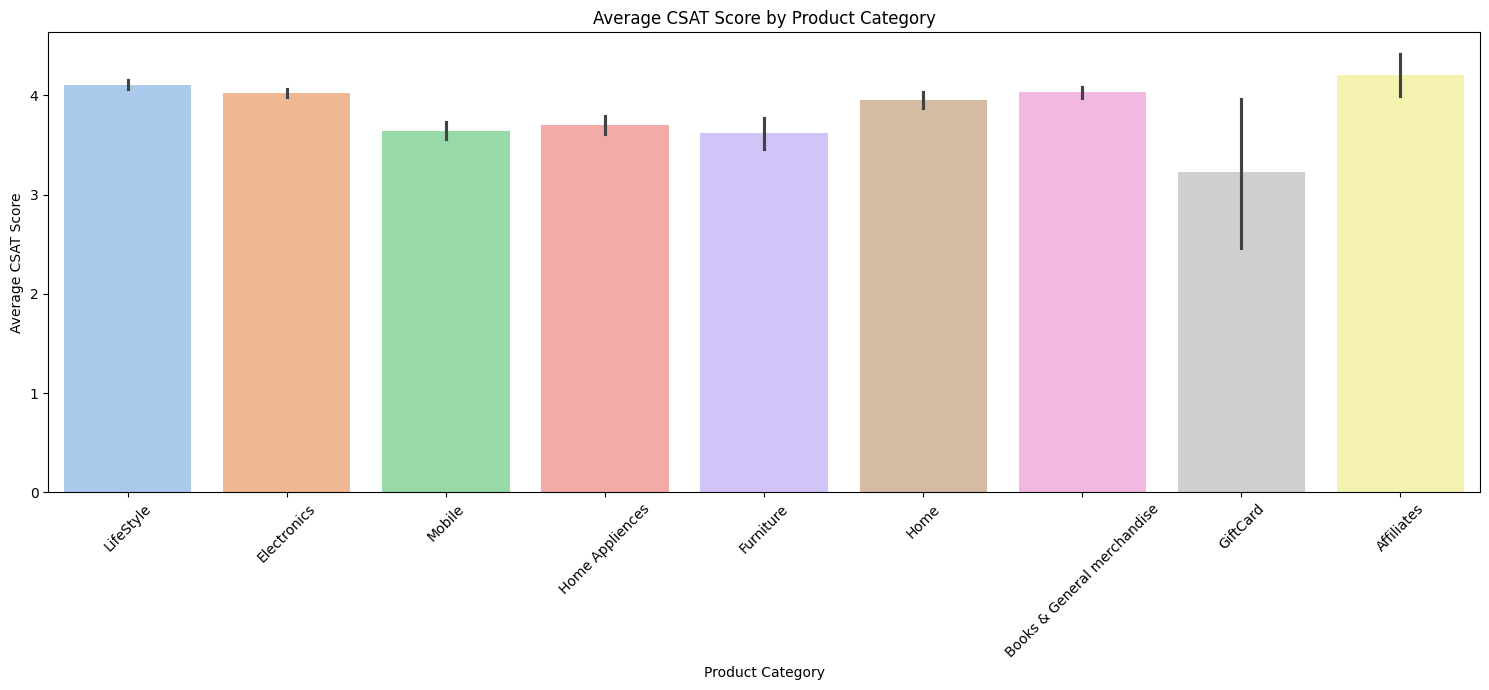

In [47]:
# Chart - 10 visualization code

# Filtering  out the "Not Available" product category
filtered_df = df[df['Product_category'] != 'Not Available']

plt.figure(figsize=(15, 7))
sns.barplot(x='Product_category', y='CSAT Score', data=filtered_df, palette='pastel',hue='Product_category',legend=False)
plt.xlabel('Product Category')
plt.ylabel('Average CSAT Score')
plt.title('Average CSAT Score by Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### 1. Why did I pick the specific chart?



I have choose bar-chart to identify the CSAT Score across the different Product categories.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that the Electronics, Lifestyle, Affiliates and Home categories have average CSAT Scores above 4, indicating high customer satisfaction. In contrast, the Mobiles and Furniture categories have average CSAT Scores of 3.5, suggesting lower customer satisfaction in these areas.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights show high CSAT Scores above 4 for Electronics, Lifestyle, Affiliates and Home categories can boost customer loyalty and sales. However, the lower CSAT Scores of 3.5 for Mobiles and Furniture indicate areas needing improvement. Addressing these lower scores is essential to prevent negative feedback and potential loss of customers.

#### Chart - 11

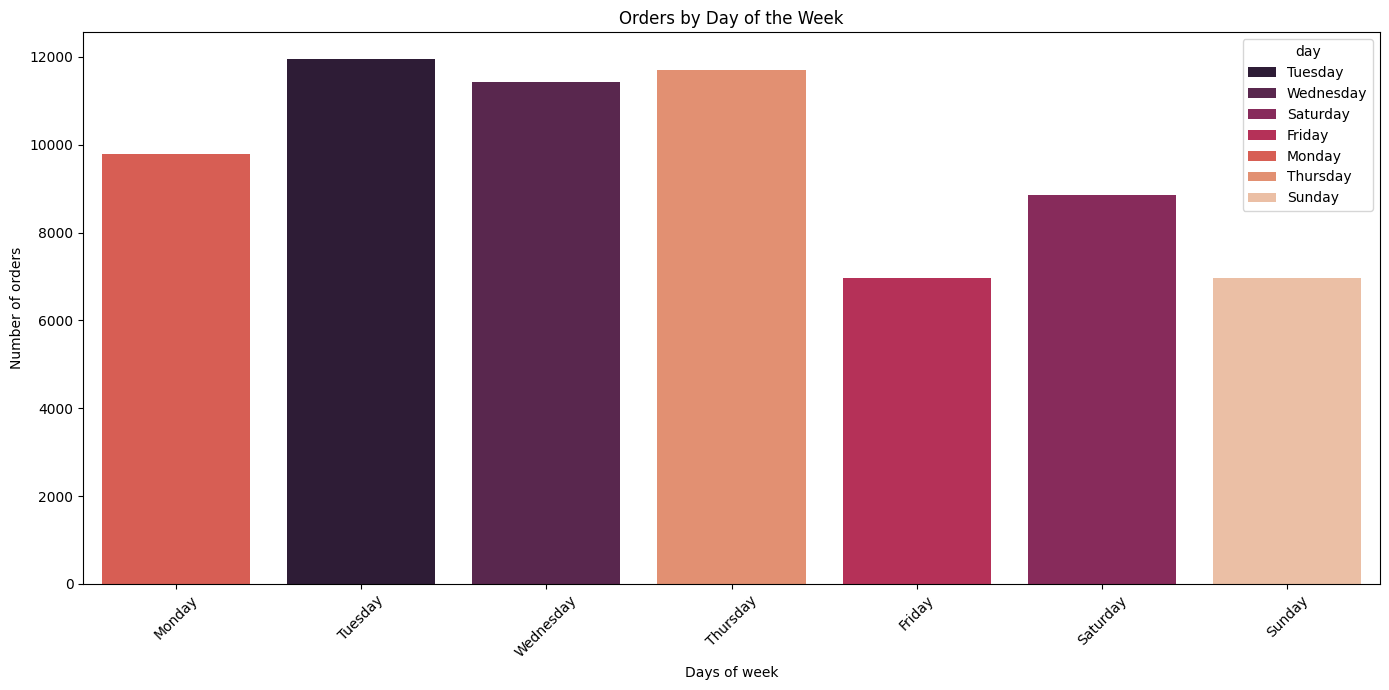

In [48]:
# Chart - 11 visualization code
plt.figure(figsize=(14,7))
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data=df,x='day',order=days_order,palette='rocket',hue='day',legend=True)
plt.xlabel('Days of week')
plt.ylabel('Number of orders')
plt.title('Orders by Day of the Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did I pick the specific chart?

The bar chart was chosen to illustrate the number of orders placed on each day of the week

##### 2. What is/are the insight(s) found from the chart?

The chart illustrates that the highest volume of orders is recorded on Tuesday, making it the most popular day for bookings. This is followed closely by Wednesday and Thursday, which also show significant order counts. In contrast, Friday stands out as the day with the fewest bookings, highlighting a potential area for improvement in customer engagement at the start of the week.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained can significantly enhance business outcomes. By identifying peak order periods, such as Tuesdays, businesses can tailor marketing strategies and optimize staffing to meet demand effectively.

However, low order counts on Fridays may indicate customer disengagement, suggesting a need to reevaluate promotional efforts for that day. Addressing these insights can lead to improved customer satisfaction and foster growth.

#### Chart - 12

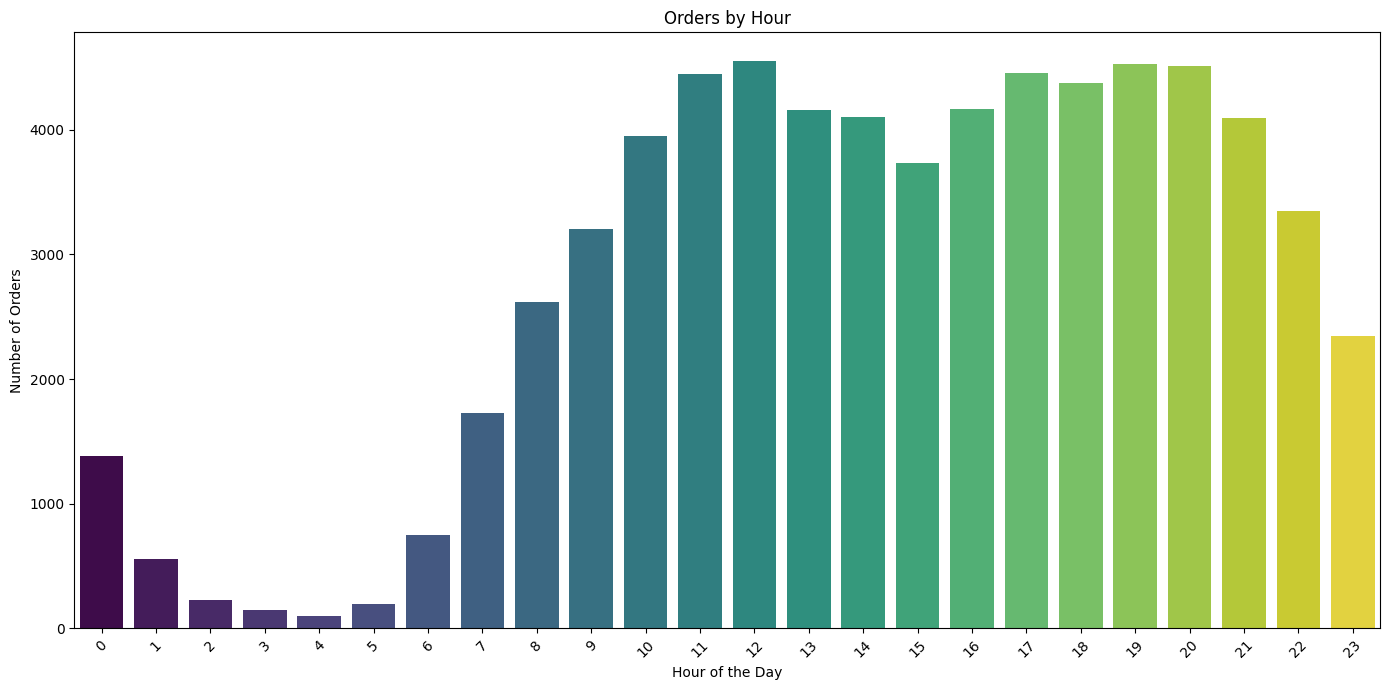

In [49]:
# Chart - 12 visualization code
plt.figure(figsize=(14,7))
sns.countplot(data=df,x='hour',palette='viridis',hue='hour',legend=False)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.title('Orders by Hour')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did I pick the specific chart?

I selected a bar chart to analyze the trends in order placements over a 24-hour period.

##### 2. What is/are the insight(s) found from the chart?

The chart illustrates that the evening and afternoon hours experience the highest volume of order placements, particularly peaking at 12:00 and 19:00. This time is notably the busiest for orders, followed closely by 11:00, 17:00, and 20:00, which also see significant activity. This trend underscores a customer tendency to place orders later in the day, indicating that targeting marketing efforts or promotions during these peak afternoon and evening hours could effectively engage customers and enhance sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights from the analysis of order placements indicate a potential for positive business impact. With peak order times identified in the afternoon, especially at 12:00, businesses can target marketing efforts and promotions during these hours to effectively engage customers and boost sales.

#### Chart - 13

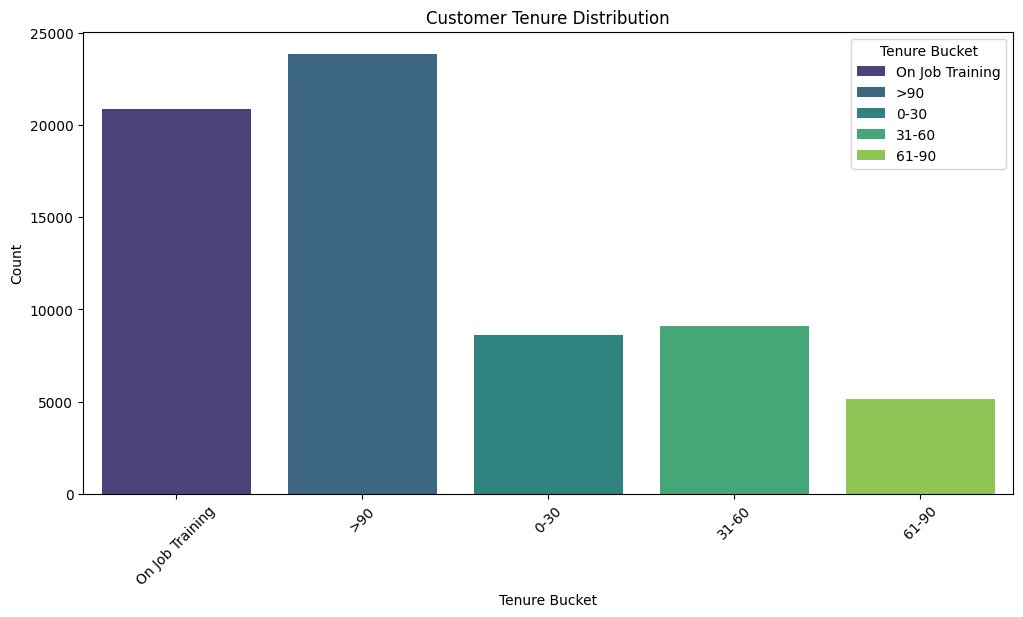

In [50]:
# Chart - 13 visualization code
plt.figure(figsize=(12,6))
sns.countplot(x='Tenure Bucket',palette='viridis',data=df,hue='Tenure Bucket',legend=True)
plt.xlabel('Tenure Bucket')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Customer Tenure Distribution')
plt.show()

##### 1. Why did I pick the specific chart?

I selected this chart to show how many customers fall into each Tenure bucket, making it easy to compare groups.

##### 2. What is/are the insight(s) found from the chart?

Most customers are either new (On Job Training) or have tenure >90 days. Fewer customers are in the mid-tenure range (especially 61–90 days).



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 On the positive side, a high number of customers are in the "On Job Training" and ">90" day tenure buckets. This indicates that the business is effectively onboarding new users and successfully retaining a significant portion of them over the long term, reflecting strong acquisition strategies and customer loyalty.

 However, on the negative side, there is a noticeable drop in the number of customers in the 61–90 day tenure range. This suggests that many users are churning within 2–3 months, possibly due to declining engagement, lack of personalized support, or unmet expectations.

#### Chart - 14



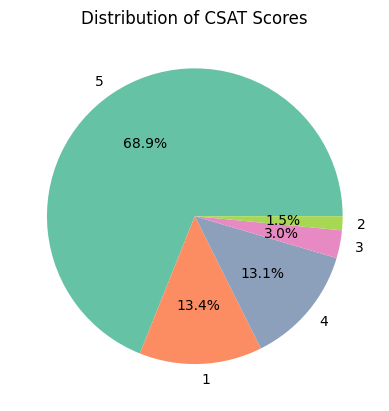

In [51]:
# Chart - 14 visualization code
# Calculating distribution of CSAT scores
colors=['#66c2a5', '#fc8d62', '#8da0bb', '#e78ac3', '#a6d854']

# plot the pie chart
plt.pie(df['CSAT Score'].value_counts(),labels=df['CSAT Score'].value_counts().index,colors=colors,autopct='%1.1f%%')
plt.title('Distribution of CSAT Scores')
plt.show()

##### 1. Why did I pick the specific chart?

I have choosen Pie chart to analyse the CSAT Score distribution.

##### 2. What is/are the insight(s) found from the chart?

The pie chart demonstrates that 68.9% of responses indicate a CSAT Score of 5, signifying a high level of customer satisfaction. Conversely, CSAT Scores of 1 account for 13.4% of the responses, representing a minority of customers who report lower or very low satisfaction, while CSAT Scores of 4 make up 13.1%. This distribution emphasizes that most customers are highly satisfied, whereas a smaller segment experiences lower satisfaction levels.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positve Impact: The insights gained from the CSAT Score distribution indicate that a significant majority of customers are highly satisfied, with 68.9% scoring a 5. This level of customer satisfaction can lead to positive business outcomes, such as increased customer loyalty, higher retention rates, and positive word-of-mouth referrals, ultimately driving sales and enhancing brand reputation.

Negative Impact: The presence of 13.4% of responses scoring a 1 indicates a segment of customers experiencing very low satisfaction. This negative feedback could signal underlying issues that, if unaddressed, may lead to decreased customer loyalty and potential churn.

#### Chart - 15 - Correlation Heatmap

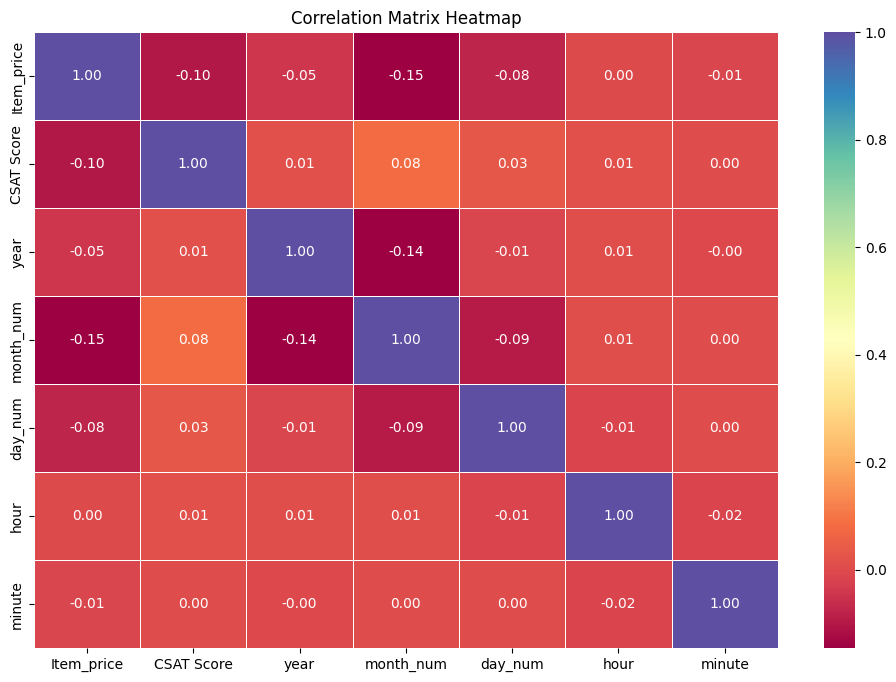

In [52]:
# Correlation Heatmap visualization code
numeric_data = df.select_dtypes(include=['number'])

# Computing correlation matrix for the numerical data
correlation_matrix = numeric_data.corr()
plt.figure(figsize = (12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='Spectral', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

##### 1. Why did I pick the specific chart?

The purpose to pick corelation-heat map is to visualize the relation between each numeric variables.

##### 2. What is/are the insight(s) found from the chart?

The chart does not show any strong relationships between the variables.

#### Chart - 16 - Pair Plot

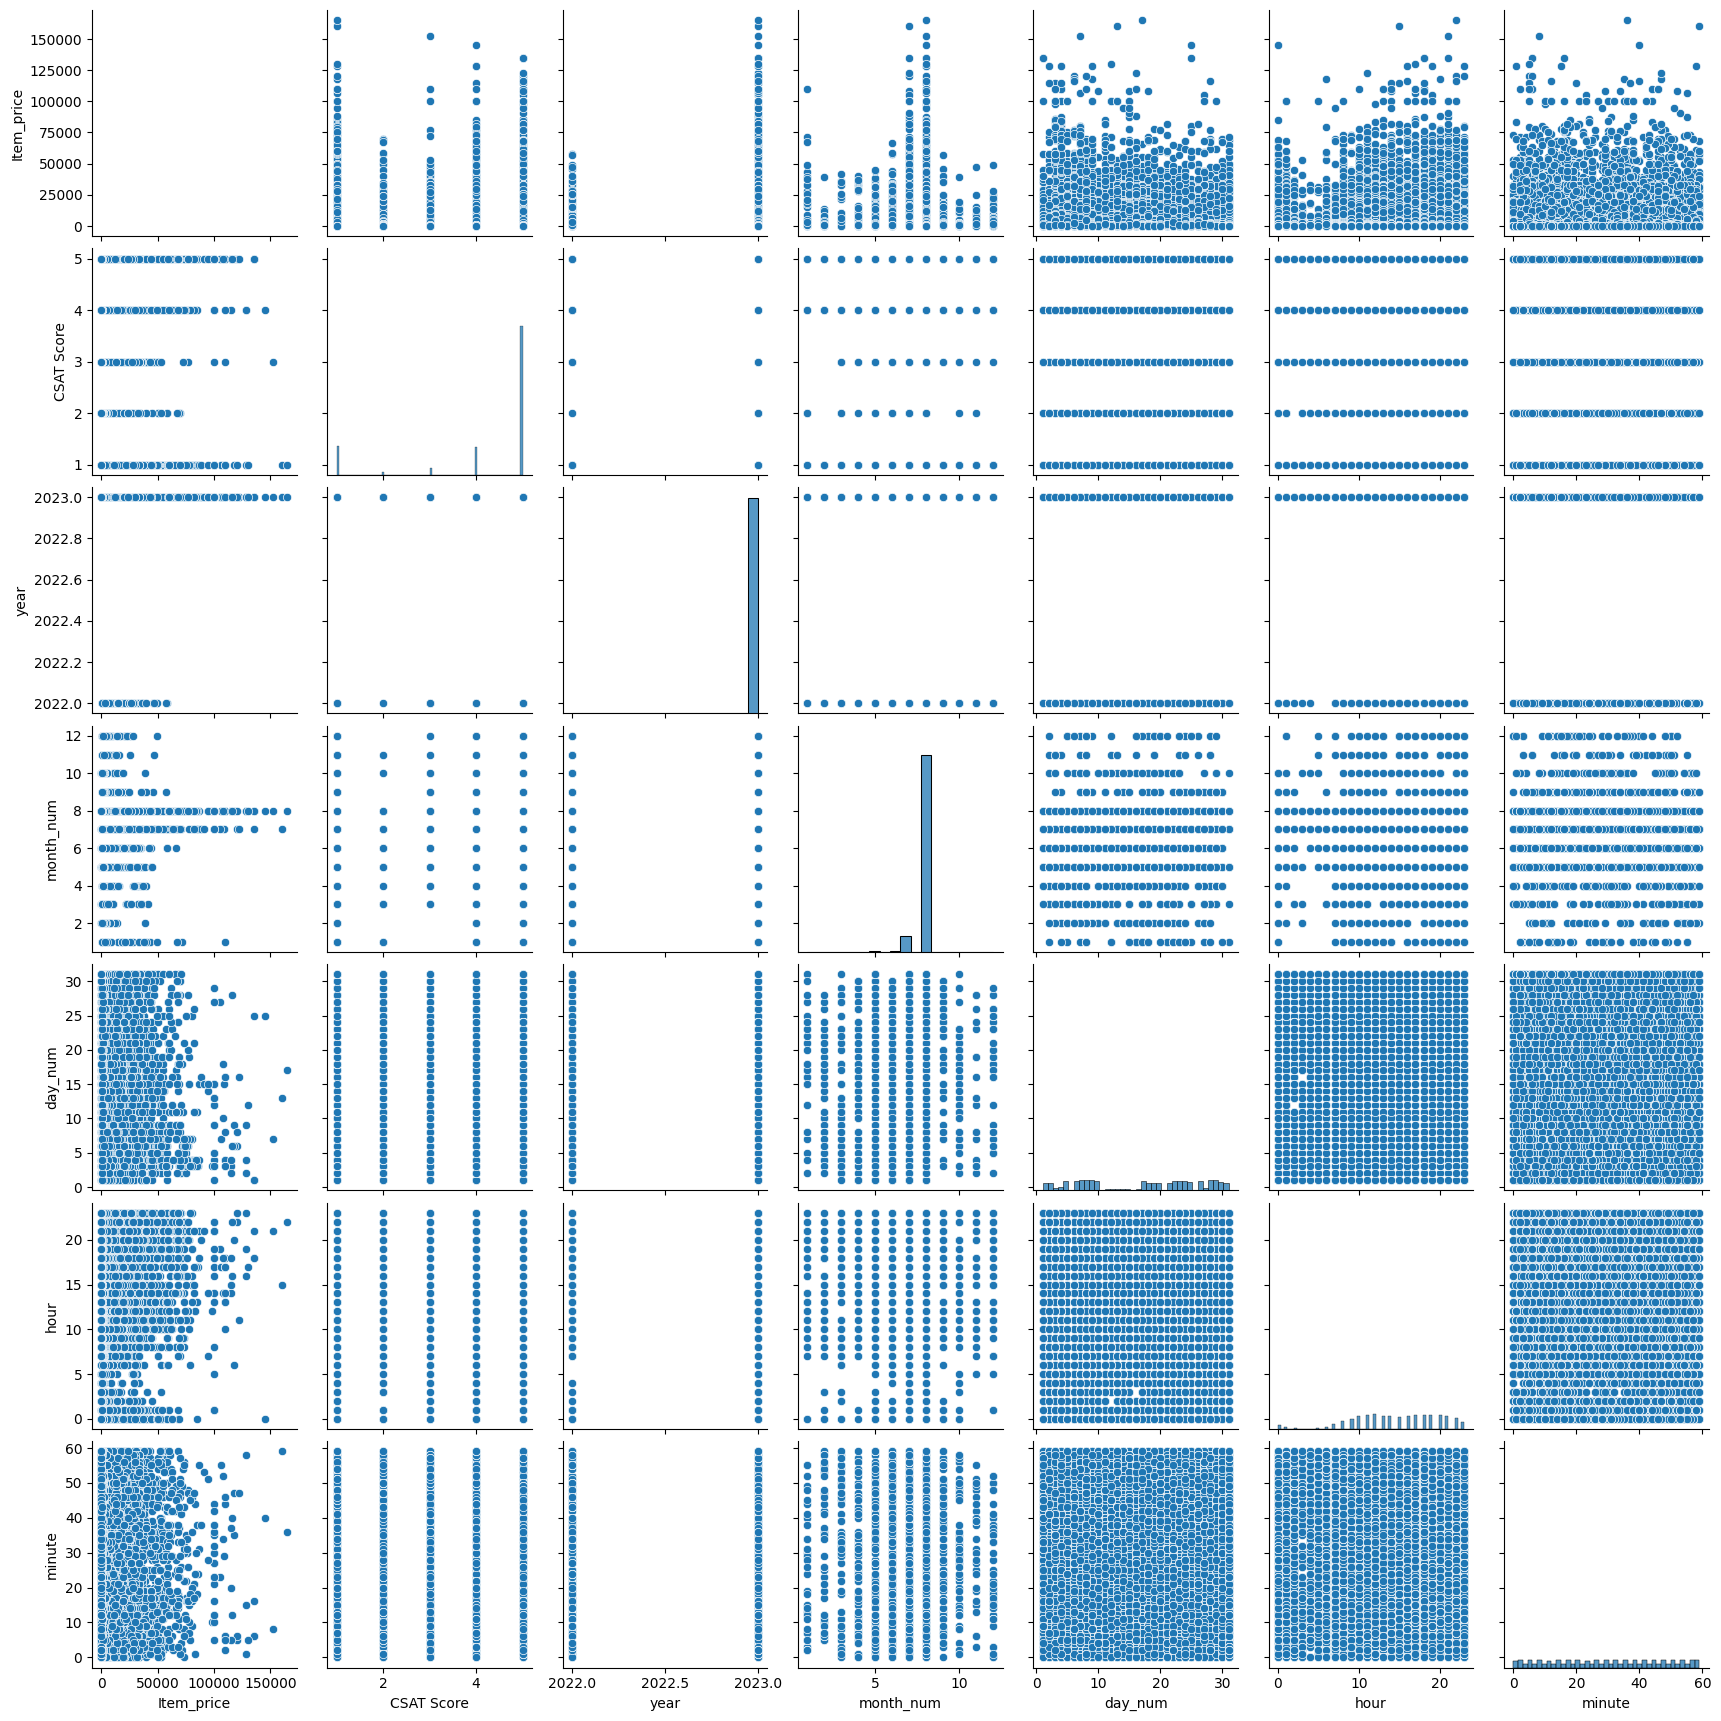

In [53]:
# Pair Plot visualization code
sns.pairplot(df)
plt.show()

##### 1. Why did I pick the specific chart?

I picked the pairplot because it provides a clear view of relationships between multiple variables at once. This visualization helps identify correlations and patterns across different features, reveals how variables interact with each other, and highlights distributions and potential outliers.

##### 2. What is/are the insight(s) found from the chart?

The pair-plot chart does not reveals any strong relationship between the variables.

## ***5. Hypothesis Testing***

### Hypothetical Statement - 1

In [54]:
print(df['CSAT Score'].mean())

4.225445142223864


From the distribution of CSAT scores, I found that the mean CSAT score is 4.22. Let's use hypothesis testing to see if this statement is true.

Null Hypothesis (H₀): μ = 4.18

Alternate Hypothesis (H₁): μ ≠ 4.18



In [55]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_1samp

# test data for CSAT Score
test_data2=df['CSAT Score']

# Perform one-sample t-test
stats,p=ttest_1samp(test_data2,4.18)
print("t-statistic = %.2f, p-value= %.3f" % (stats,p))

alpha=0.05
if p<alpha:
  print("Reject the null hypothesis: The mean CSAT Score is significantly different from 4.18.")
else:
  print("Fail to reject the null hypothesis: The mean CSAT Score is not significantly different from 4.18.")

t-statistic = 8.49, p-value= 0.000
Reject the null hypothesis: The mean CSAT Score is significantly different from 4.18.


##### Why did I choose the specific statistical test?

I chosen one-sample t-test because I wanted to determine if the mean CSAT score in my dataset is significantly different from 4.18. This test is ideal for comparing the sample mean to a specific value, and it’s suitable for my data to check if it deviates from the hypothesized population mean.

### Hypothetical Statement - 2

In [56]:
print(df['Item_price'].mean())

1439.2211599556704


Item_price mean is 1439.22 in the data set, Let us conduct a Hypothesis testing to know the mean value of Item_price is significantly different or not.

Null Hypothesis (H₀): μ = 1539.22

Alternate Hypothesis (H₁): μ ≠ 1539.22

In [57]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import ttest_1samp

# Define the hypothesized mean
hypothesized_mean = 1539.22

# Perform one-sample t-test
test_data1 = df['Item_price']
t_stat, p_value = ttest_1samp(test_data1, hypothesized_mean)

# Print the t-statistic and p-value
print('t-statistic = %.2f, p-value = %.3f' % (t_stat, p_value))

# Define significance level (commonly 0.05)
alpha = 0.05

# Make a decision based on p-value
if p_value <= alpha:
    print("Reject null hypothesis: The mean of Item_price is significantly different from 1539.22.")
else:
    print("Fail to reject null hypothesis: The mean of Item_price is not significantly different from 1539.22.")


t-statistic = -3.76, p-value = 0.000
Reject null hypothesis: The mean of Item_price is significantly different from 1539.22.


##### Why did I choose the specific statistical test?

I chose the one-sample t-test because I wanted to know if the mean Item_price in my dataset is significantly different from 1539.22. This test is ideal for comparing the sample mean to a specific value, and it’s suitable for my data to check if it deviates from the hypothesized population mean.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [58]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

,0
Unique id,0
channel_name,0
category,0
Sub-category,0
Customer Remarks,0
Order_id,0
order_date_time,0
Issue_reported at,0
issue_responded,0
Survey_response_Date,0


#### What all missing value imputation techniques have I used and why did I use those techniques?

The dataset currently contains no null values. However, if null values were to be introduced, we could use suitable imputation methods to fill them in. The choice of imputation technique would depend on the nature and distribution of the data, ensuring that we maintain the dataset's integrity and accuracy.

### 2. Handling Outliers

In [59]:
# Handling Outliers & Outlier treatments
# Calculate Q1 and Q3 while excluding zeros
Q1=df[df['Item_price']!=0]['Item_price'].quantile(0.25)
Q3=df[df['Item_price']!=0]['Item_price'].quantile(0.75)
IQR=Q3-Q1

# Determine the lower and upper bounds for outliers,excluding zeros
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

# Identify outliers without creating a new DataFrame
outliers = df[(df['Item_price'] < lower_bound) | (df['Item_price'] > upper_bound) & (df['Item_price']!=0)]

# Count the number of outliers
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 3394


In [60]:
# Calculate percentage of Outliers
outlier_percentage=(len(outliers)/len(df))*100
print(f'The percentage of outliers in Item_price: {outlier_percentage:.2f}%')

The percentage of outliers in Item_price: 5.02%


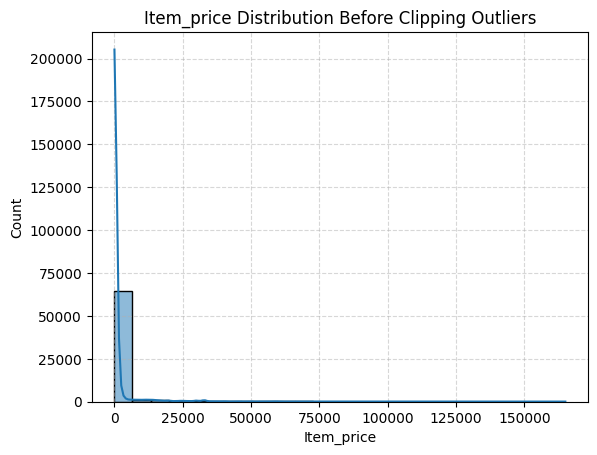

In [61]:
# Plot Item_price distribution before clipping
sns.histplot(data=df,x='Item_price',kde=True,bins=25)
plt.title('Item_price Distribution Before Clipping Outliers')
plt.grid(True,linestyle='--',alpha=0.5)
plt.show()

In [62]:
df['Item_price']=df['Item_price'].clip(lower=lower_bound,upper=upper_bound)

In [63]:
new_outliers = df[(df['Item_price'] < lower_bound) | (df['Item_price'] > upper_bound) & (df['Item_price']!=0)]
new_outliers_count = len(new_outliers)
new_outliers_percentage = (new_outliers_count / len(df)) * 100
print(f"The percentage of new outliers after clipping is {new_outliers_percentage: .2f}%")

The percentage of new outliers after clipping is  0.00%


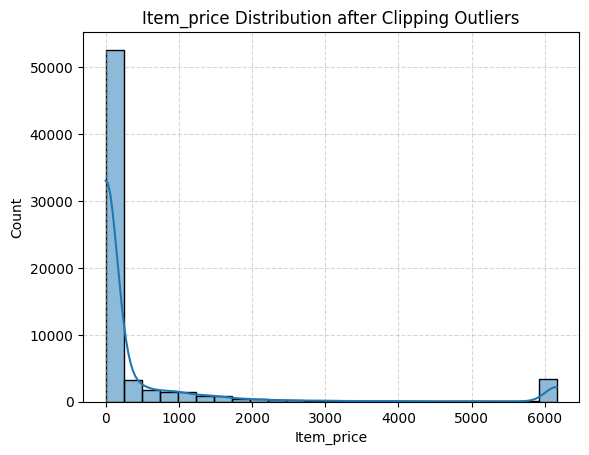

In [64]:
# Plot Item_price distribution after clipping
sns.histplot(data=df,x='Item_price',kde=True,bins=25)
plt.title('Item_price Distribution after Clipping Outliers')
plt.grid(True,linestyle='--',alpha=0.5)
plt.show()

##### What all outlier treatment techniques have I used and why did I use those techniques?

Since 5.67% of the Item_price values are identified as outliers, I opted for the IQR method to detect these extreme values. The IQR technique is a robust approach that focuses on the spread of the middle 50% of the data, making it less influenced by extreme values compared to methods like standard deviation.

To calculate the IQR, I determined the difference between the 75th percentile (Q3) and the 25th percentile (Q1). Any values falling outside the calculated bounds were flagged as outliers, which helped me identify potential anomalies in the Item_price data.

I established the upper and lower bounds, and to address these outliers, I employed clipping. This technique allowed me to adjust the outlier values so they remain within a specified range without completely removing them from the dataset.

### 3. Handling Imbalanced Dataset

In [65]:
# Filter to keep only valid CSAT Scores between 1 and 5
df = df[df['CSAT Score'].between(1, 5)]

# Ensuring that our target variable remains int.
df['CSAT Score'] = df['CSAT Score'].astype(int)

In [66]:
df.drop(columns=['Unique id'], inplace=True)

In [67]:
X = df.drop(columns=['CSAT Score'])
y = df['CSAT Score']

In [68]:
y.value_counts().reset_index()

,CSAT Score,count
0,5,46655
1,1,9090
2,4,8836
3,3,2060
4,2,1034


In [69]:
# Handling Imbalanced Dataset (If needed)
from imblearn.over_sampling import RandomOverSampler

# Initialize RandomOverSampler
oversample = RandomOverSampler(random_state=42)

# Apply oversampling to training data
X, y  = oversample.fit_resample(X, y)

In [70]:
X.shape,y.shape

((233275, 24), (233275,))

What technique did I use to handle the imbalance dataset and why?

To address the imbalance in the dataset, I utilized RandomOverSampler. This approach balances the dataset by randomly replicating samples from the minority classes until all classes are represented equally.

### 4. Data Splitting

The optimal strategy for data preprocessing begins with splitting the dataset into training and test sets. Once the split is complete, encoding and scaling should be applied separately to the training and test sets. This approach ensures that the preprocessing steps do not unintentionally include information from the test set during the training process.

In [71]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
from sklearn.preprocessing import label_binarize
# Binarize y_test for ROC curve calculation (for multi-class problems)
y_test_binarized = label_binarize(y_test, classes=[1, 2, 3, 4, 5])  # Ensure all classes 1-5 are included

### 5. Categorical Encoding

In [73]:
pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.0 MB/s eta 0:00:00


In [74]:
# Identify categorical columns with high cardinality (more than 30 unique values)
cat_features_high_car=[column for column in df.columns if df[column].dtype=='O' and df[column].nunique()>30]

# Identify categorical columns with low cardinality (less than 30 unique values)
cat_features=[column for column in df.columns if df[column].dtype=='O' and df[column].nunique()<=30]

# Import Binary Encoder for high-cardinality categorical features and necessary transformers from sklearn
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder
from sklearn.compose import ColumnTransformer


In [75]:
# Initialize Binary encoder for high-cardinality categorical features
encoder=BinaryEncoder(cols=cat_features_high_car)
# Initialize OneHotEncoder for low-cardinality categorical features
onehotencoder=OneHotEncoder(drop='first',sparse_output=False,dtype='int')

In [76]:
# Apply Binary Encoding to the Training and Testing data
X_train=encoder.fit_transform(X_train)
X_test=encoder.transform(X_test)

In [77]:
# Initialize OneHotEncoder for low-cardinality categorical features
onehotencoder = OneHotEncoder(drop='first', sparse_output=False, dtype=np.int64)

# Create a ColumnTransformer to apply OneHotEncoder to low-cardinality features
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", onehotencoder, cat_features),  # Apply OneHotEncoder to low-cardinality features
    ], remainder='passthrough'  # Pass through other columns without transformation
)

In [78]:
# Apply One-Hot Encoding to low-cardinality features and pass through high-cardinality features
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Convert the transformed arrays back to DataFrames with feature names
X_train = pd.DataFrame(X_train, columns=preprocessor.get_feature_names_out())
X_test = pd.DataFrame(X_test, columns=preprocessor.get_feature_names_out())

In [79]:
X_train.head()

,OneHotEncoder__channel_name_Inbound,OneHotEncoder__channel_name_Outcall,OneHotEncoder__category_Cancellation,OneHotEncoder__category_Feedback,OneHotEncoder__category_Offers & Cashback,OneHotEncoder__category_Onboarding related,OneHotEncoder__category_Order Related,OneHotEncoder__category_Others,OneHotEncoder__category_Payments related,OneHotEncoder__category_Product Queries,...,remainder__Supervisor_1,remainder__Supervisor_2,remainder__Supervisor_3,remainder__Supervisor_4,remainder__Supervisor_5,remainder__year,remainder__month_num,remainder__day_num,remainder__hour,remainder__minute
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,2023,8,17,9,36
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,2023,8,12,15,28
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,2023,8,2,19,51
3,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,2023,8,23,15,28
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,2023,8,9,12,59


### 6. Data Scaling

In [80]:
# Scaling your data
num_columns = [column for column in X_train.columns if X_train[column].dtype != "object" and len(X_train[column].unique()) > 10]

# Import StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the numerical columns
X_train[num_columns] = scaler.fit_transform(X_train[num_columns])

# Transform the numerical columns of the test data using the fitted scaler
X_test[num_columns] = scaler.transform(X_test[num_columns])

In [81]:
# Save the original feature column names
features_columns = X_train.columns

# Convert the DataFrame to a NumPy array
# X_train = X_train.values

# Convert the test set DataFrame to a NumPy array
# X_test = X_test.values

##### Which method have I used to scale you data and why?

I used Standard Scaling (via StandardScaler) because it normalizes features to have a mean of 0 and a standard deviation of 1. This ensures equal contribution from all features, improves convergence for algorithms, and handles features with different units effectively.



# Conclusion

This project demonstrates how data analytics can unlock key insights from customer support feedback using structured cleaning, visualization, and analysis. The pipeline is scalable for further ML-based satisfaction prediction or dashboard integration.